In [ ]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import math

tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_training_data, y_training_data), (x_testing_data, y_testing_data) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_training_data = tf.convert_to_tensor(x_training_data, dtype=tf.float32)
X_training_data = tf.reshape(X_training_data, [60000,784])
Y_training_data = tf.convert_to_tensor(y_training_data, dtype=tf.float32)
induced_noise = 0.3
output_classes = [0,1,2,3,4,5,6,7,8,9]
mean_vector_input_data = []
standard_deviation_vector_input_data = []
prior_of_output_classes = []
for i in output_classes:

  classwise_data_indexes = tf.where(Y_training_data == i)[:,0]
  prior_of_output_classes.append(len(classwise_data_indexes)/60000)
  classwise_output_data = tf.gather(X_training_data, classwise_data_indexes)
  mean_vector_input_data.append(tf.math.reduce_mean(classwise_output_data, 0))

  classwise_ouput_data_float = tf.cast(classwise_output_data, dtype=tf.float32)
  standard_deviation_vector_input_data.append(tf.math.reduce_std(classwise_ouput_data_float, 0))

mean_vector_input_data_float = tf.cast(mean_vector_input_data, dtype=tf.float32)
standard_deviation_vector_input_data_float = tf.cast(standard_deviation_vector_input_data, dtype=tf.float32) + induced_noise





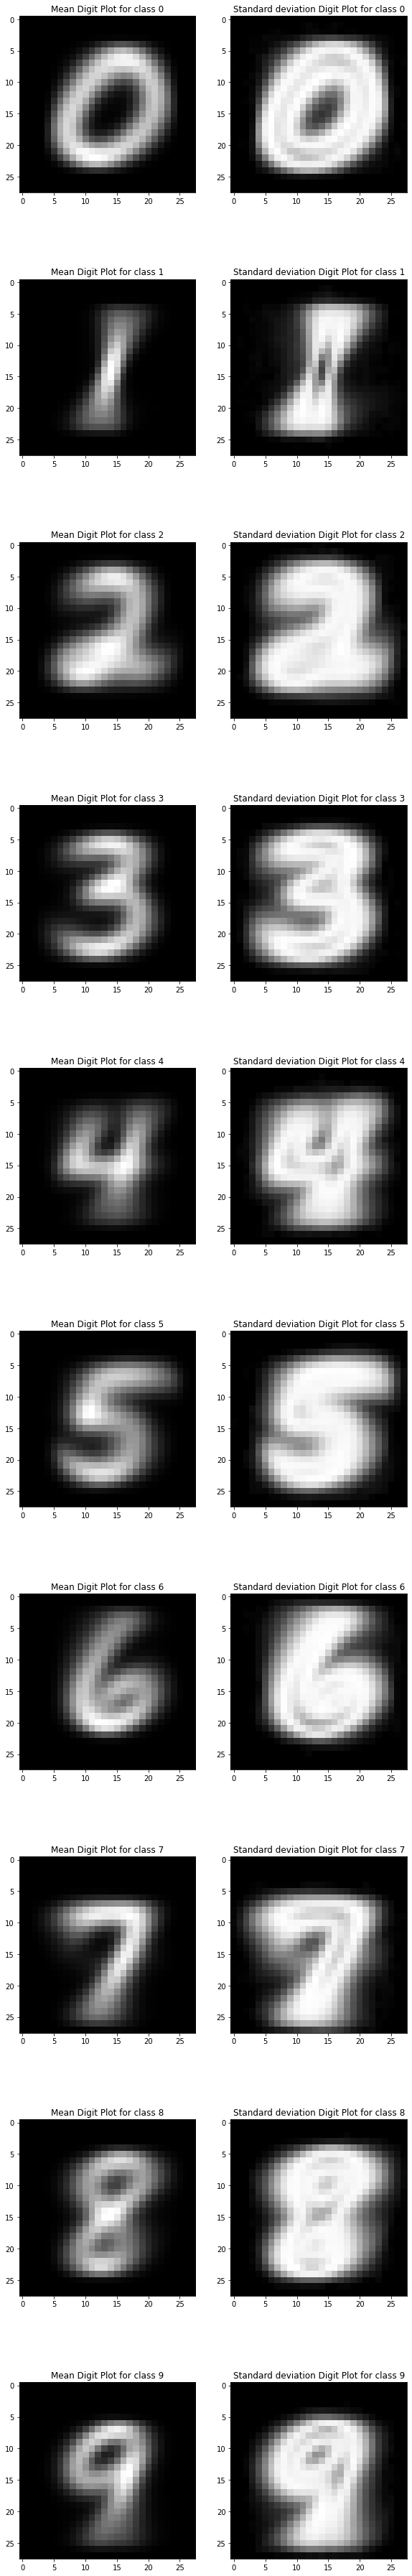

In [ ]:
mean_vector_input_data_image = tf.reshape(mean_vector_input_data, [10, 28, 28])
standard_deviation_vector_input_data_float_image = tf.reshape(standard_deviation_vector_input_data_float, [10, 28, 28])
output_image,slot =  plt.subplots(len(output_classes),2, figsize=(100, 100))
plt.subplots_adjust(bottom=0.5, right=0.2, top=1)

for i in range(0,len(output_classes)):
  for j in range(0,2):
    slot[i][0].title.set_text('Mean Digit Plot for class '+ str(i))
    slot[i][0].imshow(mean_vector_input_data_image[i], cmap='gray')
    slot[i][1].title.set_text('Standard deviation Digit Plot for class '+ str(i))
    slot[i][1].imshow(standard_deviation_vector_input_data_float_image[i], cmap='gray')


In [ ]:
def log_of_likelihood_function_with_gaussian_distribution_function(image_tensor, mean_tensor, standard_deviation_tensor):

  d = 2 * 3.1415 * standard_deviation_tensor
  e = -0.5 * tf.math.log(d)
  f =  -0.5 * tf.math.square(image_tensor - mean_tensor) / standard_deviation_tensor

  return e + f


Discriminant Function:

log(theta for all class) = Summation for all pixels ( - 0.5 * ln ( 2 X pi Xstandard_deviation) - 0.5 (pixel - mean_pixel)**2  / standard_deviation  ) + ln(prior for that class on input data)

Assumption: Features are independent on each other and this is multi variable classifier with the given assumption.




In [ ]:
X_testing_data = tf.convert_to_tensor(x_testing_data, dtype=tf.float32)
X_testing_data_reshaped = tf.reshape(X_testing_data, [10000,784])
y_output_prediction = []
output_discrinant_function = []
for i in range(0,len(X_testing_data_reshaped)):
  max_discriminant_value = 0
  max_class_index = 0
  for j in range(0, 10):
    log_likelihood_value_tensor = log_of_likelihood_function_with_gaussian_distribution_function(X_testing_data_reshaped[i], mean_vector_input_data_float[j], standard_deviation_vector_input_data_float[j] )
    log_likelihood_after_prior_addition = tf.math.reduce_sum(log_likelihood_value_tensor) + math.log(prior_of_output_classes[j])

    if j == 0:
      max_discriminant_value = log_likelihood_after_prior_addition
      max_class_index = j
    elif max_discriminant_value < log_likelihood_after_prior_addition:
      max_discriminant_value = log_likelihood_after_prior_addition
      max_class_index = j

  output_discrinant_function.append(max_discriminant_value)
  y_output_prediction.append(max_class_index)


In [ ]:
confusion_matrix = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]
confusion_tensor = tf.convert_to_tensor(confusion_matrix, dtype=tf.int32)
output_show_matrix = [[0,0],[2,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],]
correct = 0
for i in range(0, len(y_output_prediction)):
  aa = int(y_output_prediction[i])
  bb = int(y_testing_data[i])
  if y_output_prediction[i] == y_testing_data[i]:
    correct = correct + 1
    if output_show_matrix[bb][0] == 0: output_show_matrix[bb][0] = i
  else:
    if output_show_matrix[bb][1] == 0: output_show_matrix[bb][1] = i

  confusion_matrix[bb][aa] = confusion_matrix[bb][aa] + 1



accuracy = correct/len(y_output_prediction)*100
print(str(accuracy) + "% Performance accuracy")
print("Confusion Matrix:")
confusion_tensor = tf.convert_to_tensor(confusion_matrix, dtype=tf.int32)
print(confusion_tensor)

85.04% Performance accuracy
Confusion Matrix:
tf.Tensor(
[[898   0   6   2   1  43  13   1  16   0]
 [  0 998  27   2   1  37   5   0  65   0]
 [ 12   2 902  17  11   7  23   8  49   1]
 [  4   1  51 838   3  45   3  11  39  15]
 [  4   0  13   1 791  22  16   5  32  98]
 [ 21   0  10  73  11 722  14   4  26  11]
 [ 16   3  24   0   5  44 858   0   8   0]
 [  1   7  22   6  16   2   1 856  43  74]
 [ 10   3  20  49   9  53   4   3 800  23]
 [  5   2   7  11  74  17   0  19  33 841]], shape=(10, 10), dtype=int32)


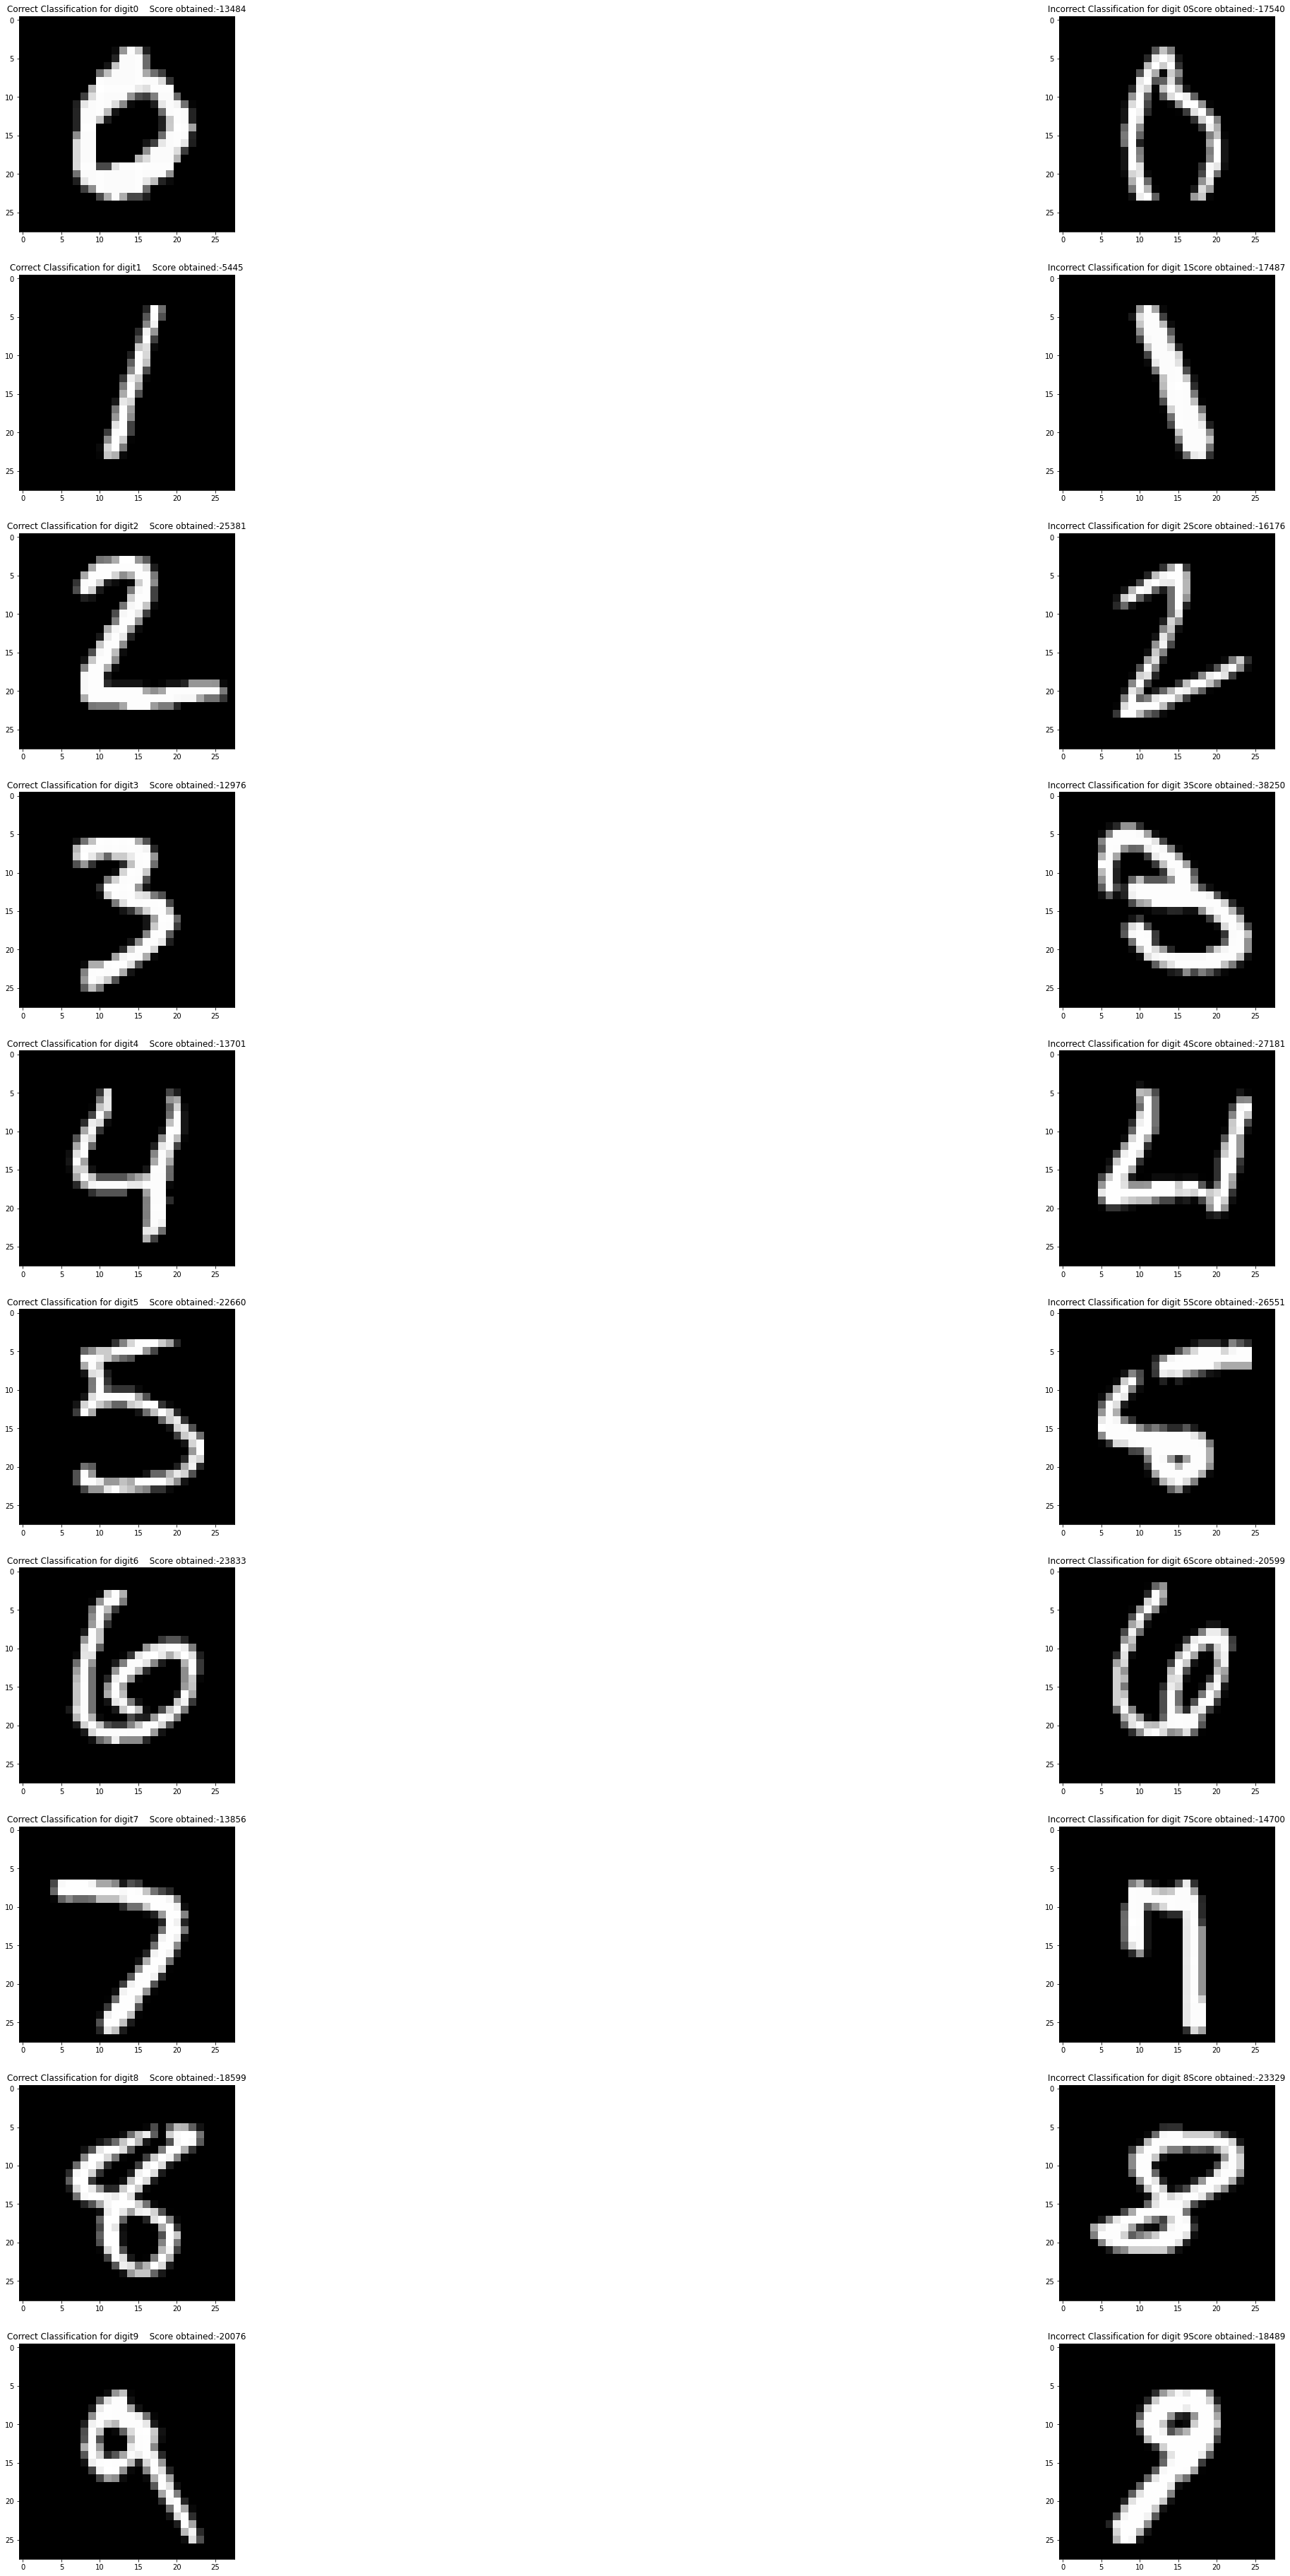

In [ ]:
X_testing_datas = tf.convert_to_tensor(x_testing_data, dtype=tf.int32)
output_images,slots =  plt.subplots(10,2, figsize=(100, 100))
plt.subplots_adjust(bottom=0.5, right=0.5, top=1)

for i in range(0,10):
    aaaa = output_show_matrix[i][1]
    bbbb = output_show_matrix[i][0]
    cccc = int(output_discrinant_function[bbbb])
    dddd = int(output_discrinant_function[aaaa])
    slots[i][0].title.set_text('Correct Classification for digit' + str(i) + "    Score obtained:" + str(cccc))
    slots[i][0].imshow(X_testing_datas[bbbb], cmap='gray')
    slots[i][1].title.set_text('Incorrect Classification for digit '+ str(i) + "Score obtained:" + str(dddd))
    slots[i][1].imshow(X_testing_datas[aaaa], cmap='gray')



Conclusion: This method doesn't perform better than many other popular ML or DL methods which are generally used because this data is 2D image where there is a relation between the pixel and pixels around the pixel which in turn gives more information related to the training model which helps the classifier to perform better on such data. We are also ignoring very much of such information which could have helped models to understand the training set better. In this case we are considering the data pixels to be independent to each other and preparing a probabilistic model accordingly  just based on the assumption the images are upright and centered in the position. While training the data we are just reshaping it to the linear vector each feature which is not showing real data of the image in any sense. This fails in handling images like upright, slanted or small sized images because of which we could observe such cases. This is not robust method which could handle any scenerio of real world. That is why I feel model performance is relatively low compared to other methods available.